# Projeto 02
Projeto Final - Aprendizado de Máquina  
## Autor: Marcos Angelo Cemim  
  
  
## Considere as seguintes informações:
Bases de dados:   
    [Travel Insurance Prediction Data](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data)   
    [Student Stress Factors: A Comprehensive Analysis](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis)  
Utilizar os classificadores: Decision Tree, KNN e K-Means.

## As notas de projeto serão classificadas de acordo com as seguintes etapas:  
### 1) Pré-processamento dos dados(transformação de dados categóricos e normalização);
### 2) Apresentação dos resultados de acurácia e matriz confusão;

### 3) Travel Insurance Prediction
    - Considerar uma versão da base de dados sem o atributo classe TravelInsurance;
    - Faça o agrupamento dos dados baseado no algoritmo K-Means. Para isso, utilize as colunas AnnualIncome e FrequentFlyer. 
    - Realizar a plotagem da distribuição dos dados por cluster;
### 4)  Student Stress Factors: A Comprehensive Analysis
    - Considerar uma versão da base de dados sem o atributo classe stress_level; 
    - Faça o agrupamento dos dados baseado no algoritmo K-Means. Para isso, utilize as colunas anxiety_level e sleep_quality. 
    - Realizar a plotagem da distribuição dos dados por cluster;

## 1) Pré-processamento dos dados(transformação de dados categóricos e normalização)

### Importação dos dados

In [1]:
import opendatasets as od
import os
import shutil

owner_user_insurance = 'tejashvi14'
project_name_insurance = 'travel-insurance-prediction-data'
owner_user_stress = 'rxnach'
project_name_stress = 'student-stress-factors-a-comprehensive-analysis'

if not os.path.isdir(f'../{project_name_insurance}/'):
    od.download(f'https://www.kaggle.com/datasets/{owner_user_insurance}/{project_name_insurance}')
    shutil.move(f'{project_name_insurance}', f'../{project_name_insurance}')
if not os.path.isdir(f'../{project_name_stress}/'):
    od.download(f'https://www.kaggle.com/datasets/{owner_user_stress}/{project_name_stress}')
    shutil.move(f'{project_name_stress}', f'../{project_name_stress}')

## Trabalhando no dataset "Travel Insurance"

### EDA

In [2]:
import pandas as pd

In [3]:
insuranceData = pd.read_csv('../travel-insurance-prediction-data/TravelInsurancePrediction.csv')
insuranceData.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
insuranceData.shape

(1987, 10)

In [5]:
for c in insuranceData.columns:
    print(f"{c:-^50s}")
    print(f'  Valores únicos: {len(list(insuranceData[c].unique()))}')
    print(f'Total de valores: {len(list(insuranceData[c]))}')
    if len(list(insuranceData[c].unique())) < 15:
        print(f'Lista de valores: {sorted(list(insuranceData[c].unique()))}')
    print(f'   Valores Nulos: {insuranceData[c].isna().sum()}')
    print(f'    Tipo de dado: {insuranceData[c].dtype}')
    print()

--------------------Unnamed: 0--------------------
  Valores únicos: 1987
Total de valores: 1987
   Valores Nulos: 0
    Tipo de dado: int64

-----------------------Age------------------------
  Valores únicos: 11
Total de valores: 1987
Lista de valores: [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
   Valores Nulos: 0
    Tipo de dado: int64

-----------------Employment Type------------------
  Valores únicos: 2
Total de valores: 1987
Lista de valores: ['Government Sector', 'Private Sector/Self Employed']
   Valores Nulos: 0
    Tipo de dado: object

------------------GraduateOrNot-------------------
  Valores únicos: 2
Total de valores: 1987
Lista de valores: ['No', 'Yes']
   Valores Nulos: 0
    Tipo de dado: object

-------------------AnnualIncome-------------------
  Valores únicos: 30
Total de valores: 1987
   Valores Nulos: 0
    Tipo de dado: int64

------------------FamilyMembers-------------------
  Valores únicos: 8
Total de valores: 1987
Lista de valores: [2, 3, 4, 5, 6, 7, 

In [6]:
# Remover a coluna 'Unnamed: 0'
insuranceData.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Transformando as colunas em categorias/labels:
# ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
for c in ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']:
    insuranceData[c] = le.fit_transform(insuranceData[c])

In [8]:
insuranceData.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [9]:
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int32
 2   GraduateOrNot        1987 non-null   int32
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int32
 7   EverTravelledAbroad  1987 non-null   int32
 8   TravelInsurance      1987 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 108.8 KB


### Separação - Treino / Teste

In [ ]:
# Separação entre treino e teste
from sklearn.model_selection import train_test_split
X = insuranceData.drop(['TravelInsurance'], axis=1).values
y = insuranceData['TravelInsurance'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=42)

### Algoritmos

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42, 
                             splitter = "random",
                             min_samples_split = 2,
                             min_samples_leaf = 10,
                             min_impurity_decrease = 0.015,
                            #  max_leaf_nodes=500,
                            #  max_depth=15
                            )
clf.fit(X_train, y_train)

# Predizer os valores
y_pred = clf.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Considerando que o objetivo seria prever o faturamento, podemos dizer que temos um modelo bastante apurado:  
Das 597 amostras avalidas, apenas 16 foram preditas como "compradoras"e não adquiriram o produto. 

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'euclidean',
                           n_neighbors=7,
                           p=2,
                           algorithm='auto'
                           )
knn.fit(X_train, y_train)
# Predizer os valores
y_pred = knn.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Pode-se dizer que o algoritmo KNN teve um desempenho similar ao DecisionTree, utilizando a mesma base. 

#### Normalizando os dados 

In [20]:
insuranceDataNorm = insuranceData.copy()
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
# Colunas normalizadas: 'Age', 'AnnualIncome', 'FamilyMembers'

insuranceDataNorm[['Age', 'AnnualIncome', 'FamilyMembers']] = std.fit_transform(insuranceDataNorm[['Age', 'AnnualIncome', 'FamilyMembers']])

In [21]:
X_norm = insuranceDataNorm.drop(['TravelInsurance'], axis=1).values
y_norm = insuranceDataNorm['TravelInsurance'].values
X_trainNorm, X_testNorm, y_trainNorm, y_testNorm = train_test_split(X_norm,y_norm,train_size=0.7, test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

#### Decision Tree Normalizado

In [ ]:
clfNorm = DecisionTreeClassifier(criterion="entropy", random_state=42, 
                             splitter = "random",
                             min_samples_split = 5,
                             min_samples_leaf = 2,
                            #  min_impurity_decrease = 0.01,
                             max_leaf_nodes=128,
                             max_depth=18
                            )
clfNorm.fit(X_trainNorm, y_trainNorm)

# Predizer os valores
y_predNorm = clfNorm.predict(X_testNorm)

# Medindo a acurácia do modelo
accuracy_score(y_testNorm, y_predNorm)

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_testNorm, y_predNorm)
ConfusionMatrixDisplay(cm).plot()


Para o algoritmo Decision Tree neste cenário, normalizar os dados com os parâmetros utilizados mostra-se irrelevante

#### KNN Normalizado

In [ ]:
knnNorm = KNeighborsClassifier(metric = 'euclidean',
                           n_neighbors=11,
                           p=2,
                           algorithm='auto'
                           )
knnNorm.fit(X_trainNorm, y_trainNorm)
# Predizer os valores
y_predNorm = knnNorm.predict(X_testNorm)

# Medindo a acurácia do modelo
accuracy_score(y_testNorm, y_predNorm)

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Neste caso, o resultado fica ligeiramente pior, mas sem ser relevante para a análise.

#### Clusterizando com k-means

In [11]:
insuranceData.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(insuranceDataNorm[['AnnualIncome', 'FrequentFlyer']])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

c:\Users\mcemi\Documents\Mestrado\2023-02_disc_IA\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mcemi\Documents\Mestrado\2023-02_disc_IA\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mcemi\Documents\Mestrado\2023-02_disc_IA\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mcemi\Documents\Mestrado\2023-02_disc_IA\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

In [13]:
wcss

[282052131354129.0,
 69576378228639.03,
 37800077618187.336,
 19473011452558.617,
 14342894792717.367,
 9187989294722.75,
 6018535362263.949,
 4603753805998.088,
 3590314123664.636,
 2838579346414.2266,
 2223494772920.8647,
 1743591460088.2722,
 1399527197200.5242,
 1106922092761.3022]

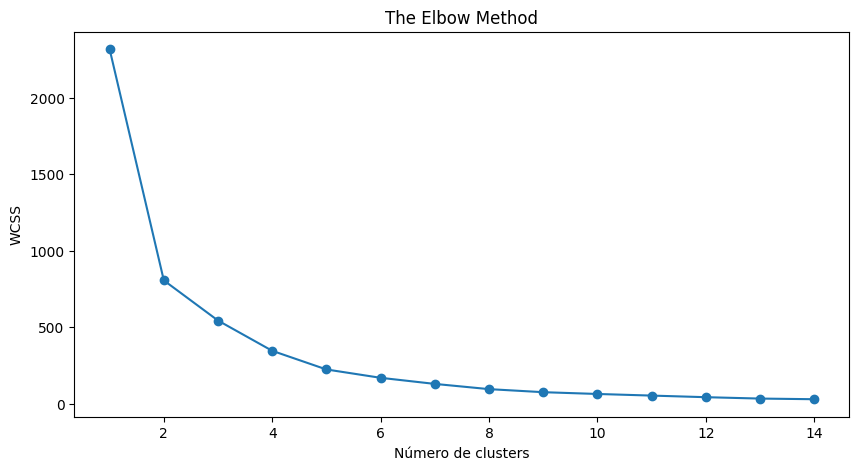

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)
kmeans1 = kmeans.fit(insuranceDataNorm[['AnnualIncome', 'FrequentFlyer']])
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
# Classificação dos dados
classificacao = kmeans1.labels_


c:\Users\mcemi\Documents\Mestrado\2023-02_disc_IA\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
import plotly.express as px
import plotly.graph_objects as go
graf1 = px.scatter(x = insuranceDataNorm['AnnualIncome'], y = insuranceDataNorm['FrequentFlyer'], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [10, 10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'AnnualIncome')
graf3.update_yaxes(title = 'FrequentFlyer')
graf3.show()

## Trabalhando no dataset "Stress Level"

### EDA

In [ ]:
stressData = pd.read_csv('../student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')
stressData.head()

In [ ]:
stressData.shape

In [ ]:
for c in stressData.columns:
    print(f"{c:-^50s}")
    print(f'  Valores únicos: {len(list(stressData[c].unique()))}')
    print(f'Total de valores: {len(list(stressData[c]))}')
    if len(list(stressData[c].unique())) < 15:
        print(f'Lista de valores: {sorted(list(stressData[c].unique()))}')
    print(f'   Valores Nulos: {stressData[c].isna().sum()}')
    print(f'    Tipo de dado: {stressData[c].dtype}')
    print()

In [ ]:
stressData.describe().T

In [ ]:
stressData.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Transformando as colunas em categorias:
for c in list(stressData.columns):
    stressData[c] = le.fit_transform(stressData[c])

In [ ]:
stressData.head()

In [ ]:
stressData.info()

### Separação - Treino / Teste

In [ ]:
# Separação entre treino e teste
X = stressData.drop(['stress_level'], axis=1).values
y = stressData['stress_level'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=42)

### Algoritmos

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42, 
                             splitter = "random",
                             min_samples_split = 3,
                             min_samples_leaf = 3,
                            #  min_impurity_decrease = 0.015,
                             max_leaf_nodes=500,
                             max_depth=15
                            )
clf.fit(X_train, y_train)

# Predizer os valores
y_pred = clf.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'euclidean',
                           n_neighbors=9,
                           algorithm='auto'
                           )
knn.fit(X_train, y_train)
# Predizer os valores
y_pred = knn.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Pode-se dizer novamente que o algoritmo KNN teve um desempenho similar ao DecisionTree, utilizando a mesma base.  

Para esta base, como tratam-se apenas de dados categóricos, não faz aplicar os algoritmos de normalização.  